## **KPMG - Virtual Experience**
****
### **Task 2 - Data Insights (Part 1)**

**Objective :** Recommend which of these **1000 new customers** should be targeted to drive the most value for the organisation using the existing 3 datasets **(Customer demographic, customer address and transactions)**
****
## Load Dataset :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_demo = pd.read_csv('CustomerDemographic_CLEAN.csv')
data_addr = pd.read_csv('CustomerAddress_CLEAN.csv')
data_tran = pd.read_csv('Transaction_CLEAN.csv')

## Data Preparation :
****
### **1. Customer Demographic**

In [ ]:
data_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   int64 
 1   first_name                           4000 non-null   object
 2   last_name                            4000 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   int64 
 5   DOB                                  4000 non-null   object
 6   job_title                            4000 non-null   object
 7   job_industry_category                4000 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   owns_car                             4000 non-null   object
 10  tenure                               4000 non-null   int64 
 11  age_class                            4000 n

In [ ]:
# Remove irrevelant column from customer demographic dataset for analysis
data_demo1 = data_demo.copy()
data_demo1.drop(columns=['DOB', 'first_name', 'last_name'], inplace=True)

In [ ]:
data_demo1.sample(3)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
52,53,Female,22,Software Test Engineer II,Financial Services,Mass Customer,No,16,70
227,228,Female,59,Systems Administrator II,Manufacturing,High Net Worth,No,12,40
2846,2847,Female,50,Occupational Therapist,Health,Mass Customer,No,12,50


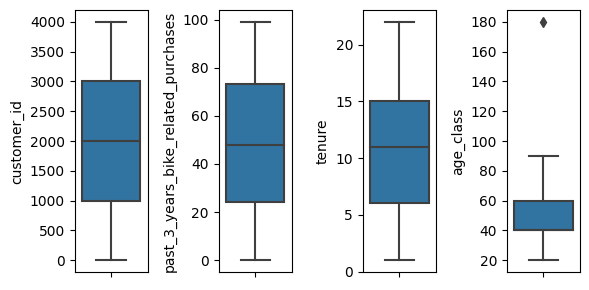

In [ ]:
# Check Outlier
nums = data_demo1.loc[:,(data_demo1.dtypes == 'int64')].columns.tolist()
plt.figure(figsize=(6, 3))
for i in range(0,len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=data_demo1[nums[i]])
  plt.tight_layout()

There are outliers in the age column. 180 years old is an abnormal number for human age. So we decided to remove this extreme value using z-score.

In [ ]:
# handling outlier with zscore
from scipy import stats

z_scores = np.abs(stats.zscore(data_demo1['age_class']))
filtered = (z_scores < 3)
data_demo1 = data_demo1[filtered]

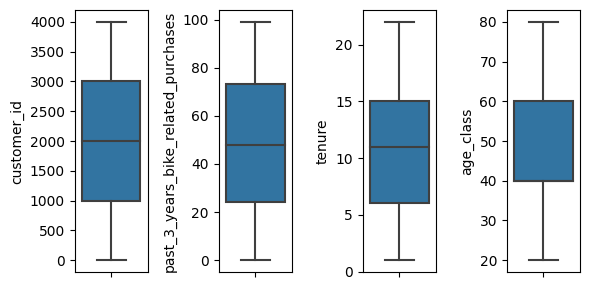

In [ ]:
# After handling outlier
plt.figure(figsize=(6, 3))
for i in range(0,len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=data_demo1[nums[i]])
  plt.tight_layout()

To make it easier to see the age distribution for further analysis, we created an age class column.
****
### **2. Customer Address**

In [ ]:
data_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
# remove irrelevant columns for analysis in customer address
data_addr1 = data_addr.copy()
data_addr1.drop(columns=['address','postcode','country'],inplace=True)

In [ ]:
data_addr1.head(2)

,customer_id,state,property_valuation
0,1,NSW,10
1,2,NSW,10


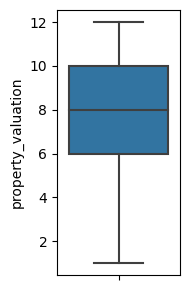

In [ ]:
# check outlier
plt.figure(figsize=(2, 3))
sns.boxplot(y=data_addr1['property_valuation'])
plt.tight_layout()

### **3. Transaction Dataset**

In [ ]:
data_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           19445 non-null  int64 
 1   product_id               19445 non-null  int64 
 2   customer_id              19445 non-null  int64 
 3   transaction_date         19445 non-null  object
 4   online_order             19445 non-null  int64 
 5   brand                    19445 non-null  object
 6   product_line             19445 non-null  object
 7   product_class            19445 non-null  object
 8   product_size             19445 non-null  object
 9   list_price               19445 non-null  int64 
 10  standard_cost            19445 non-null  int64 
 11  product_first_sold_date  19445 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.8+ MB


In [ ]:
# convert to datetime
data_tran1 = data_tran.copy()
dt = ['transaction_date', 'product_first_sold_date']
data_tran1[dt] = data_tran1[dt].astype('datetime64[ns]')

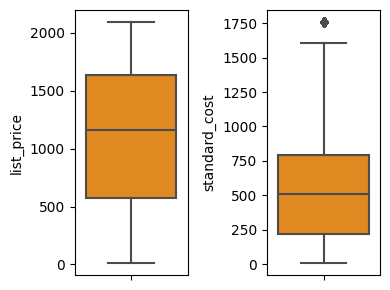

In [ ]:
# check outlier
nums = ['list_price', 'standard_cost']
plt.figure(figsize=(4, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_tran1[nums[i]], color='darkorange', orient='v')
    plt.tight_layout()

###  **4. Combine the Dataset Into Single Dataset**
### 4.1. Merge Demographic and Address

In [ ]:
# merge data demographic and addres
demo_addr = pd.merge(data_demo1, data_addr1, on='customer_id')
demo_addr.sample(2)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class,state,property_valuation
2696,2704,Male,6,Account Representative IV,Retail,Affluent Customer,Yes,3,20,NSW,5
1860,1868,Female,11,Assistant Manager,Retail,Mass Customer,No,10,30,QLD,5


In [ ]:
demo_addr.shape

(3993, 11)

### 4.2. Merge demo_addr and Transaction

In [ ]:
data_all = pd.merge(data_tran1, demo_addr, on='customer_id')
data_all.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class,state,property_valuation
1226,1736,53,1321,2017-03-06,0,OHM Cycles,Standard,medium,medium,795,...,Female,29,Editor,Argiculture,Affluent Customer,No,8,30,QLD,6
15369,6238,92,1431,2017-01-05,1,WeareA2B,Standard,medium,small,1415,...,Male,29,Sales Associate,Financial Services,Affluent Customer,Yes,17,50,NSW,9


In [ ]:
data_all.shape

(19393, 22)

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19393 entries, 0 to 19392
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19393 non-null  int64         
 1   product_id                           19393 non-null  int64         
 2   customer_id                          19393 non-null  int64         
 3   transaction_date                     19393 non-null  datetime64[ns]
 4   online_order                         19393 non-null  int64         
 5   brand                                19393 non-null  object        
 6   product_line                         19393 non-null  object        
 7   product_class                        19393 non-null  object        
 8   product_size                         19393 non-null  object        
 9   list_price                           19393 non-null  int64         
 10  standard_c

## **EDA - Exploratory Data Analysis**

In [ ]:
# making a copy of dataset for backing up
data_merged = data_all.copy()
data_merged.reset_index(inplace = True, drop = True)

In [ ]:
data_merged.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class,state,property_valuation
5895,5519,39,354,2017-08-23,1,Giant Bicycles,Standard,medium,large,1812,...,Female,87,Legal Assistant,Property,Mass Customer,No,9,40,NSW,5
1306,7035,57,1502,2017-03-18,1,WeareA2B,Touring,medium,large,1890,...,Female,52,Design Engineer,Financial Services,Affluent Customer,Yes,11,30,NSW,4


### **1. Transaction Data**

We want to **deeper analysis of datetime data** by breaking it down into more specific parts.

In [ ]:
# making backup dataset
data_transaction = data_merged.copy()

In [ ]:
# deeper analysis of datetime data by breaking it down into more specific parts
data_transaction['transaction_year'] = data_transaction['transaction_date'].dt.strftime('%Y')
data_transaction['transaction_month'] = data_transaction['transaction_date'].dt.strftime('%B')
data_transaction['transaction_quarter'] = data_transaction['transaction_date'].dt.quarter.astype(str)
data_transaction['transaction_day'] = data_transaction['transaction_date'].dt.strftime('%d')
data_transaction['transaction_weekday'] = data_transaction['transaction_date'].dt.strftime('%A')

# Drop 'transaction_date' column
data_transaction.drop(['transaction_date'],axis=1,inplace=True)

**Statistical Summary**

In [ ]:
# Descriptive statistic
data_transaction[data_transaction.columns.tolist()[21:26]].describe().T

,count,unique,top,freq
transaction_year,19393,1,2017,19393
transaction_month,19393,12,October,1719
transaction_quarter,19393,4,4,4930
transaction_day,19393,31,15,690
transaction_weekday,19393,7,Wednesday,2819


*  **Transaction year** occured in **2017**
*  **Largest monthly transaction** occur in **October**
*  **Largest quarter transaction** occur in **fourth quarter**
*  **Largest day transaction** in a month usually occur on **18th**
*  **Largest daily transaction in a week** usually occur on **Wednesday**
****
**Number of Transaction per Month**

In [ ]:
# Aggregate by month
transaction_per_month = data_transaction.groupby(['transaction_month'])[['customer_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month','number_of_transaction']

In [ ]:
# order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_per_month['month'] = pd.Categorical(transaction_per_month['month'], month_order)
transaction_per_month.sort_values('month', inplace=True)
transaction_per_month

,month,number_of_transaction
4,January,1629
3,February,1576
7,March,1590
0,April,1607
8,May,1638
6,June,1534
5,July,1666
1,August,1699
11,September,1524
10,October,1719


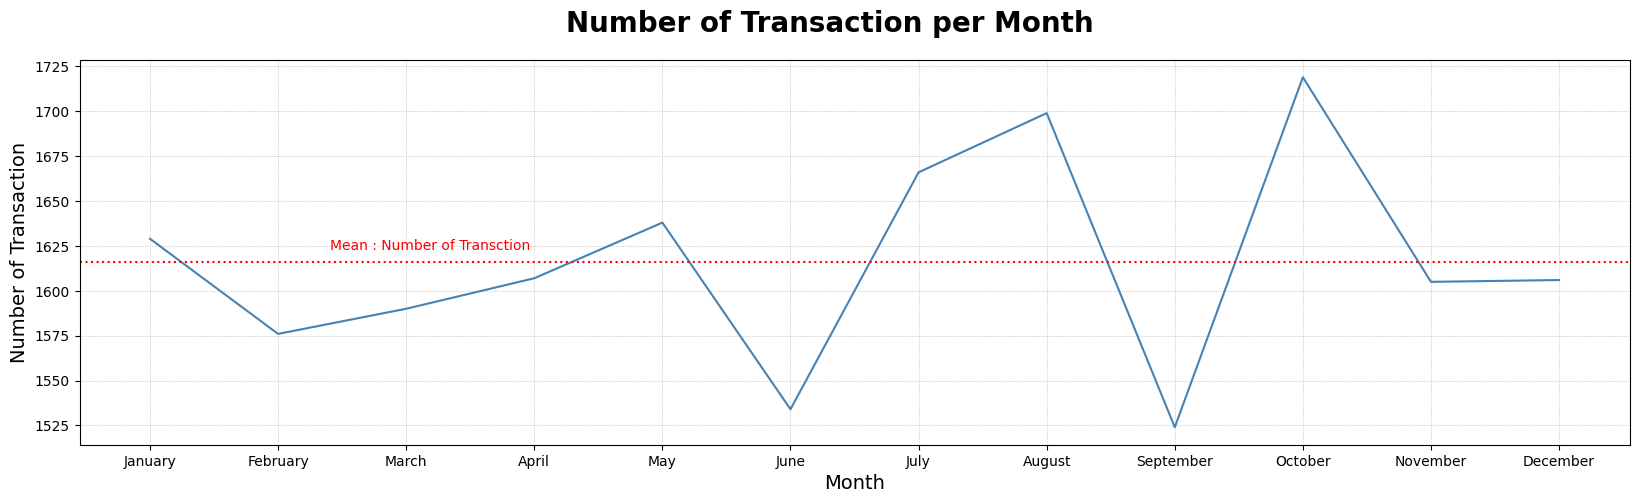

In [ ]:
# Visualization
fig = plt.figure(figsize=(20,5))

fig.suptitle('Number of Transaction per Month',fontsize=20,fontweight='bold')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Transaction',fontsize=14)

x = transaction_per_month['month']
y = transaction_per_month['number_of_transaction']
mean = y.mean()

plt.plot(x,y,color='steelblue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axhline(y=mean, color='red', linestyle=':')
plt.text(0.25, 0.5, 'Mean : Number of Transction', transform=fig.transFigure, color='red')
plt.show()

It can be seen that transactions **decreased dramatically in June and September.** In the following month **after this decrease, transactions increased significantly,** as seen in **July and October.** Further analysis can be done to dig deeper into the causes of this.
****
**Number of Transaction per Day**

In [ ]:
month_daily_transaction = data_transaction.groupby(['transaction_month','transaction_day'])[['customer_id']].count()
month_daily_transaction.reset_index(inplace=True)
month_daily_transaction.columns = ['month','day','number_of_transaction']

month_daily_transaction['month'] = pd.Categorical(month_daily_transaction['month'], month_order)
month_daily_transaction.sort_values(['month','day'], inplace=True)
month_daily_transaction

,month,day,number_of_transaction
119,January,01,54
120,January,02,45
121,January,03,53
122,January,04,56
123,January,05,63
...,...,...,...
86,December,26,54
87,December,27,51
88,December,28,55
89,December,29,52


<Axes: xlabel='day', ylabel='month'>

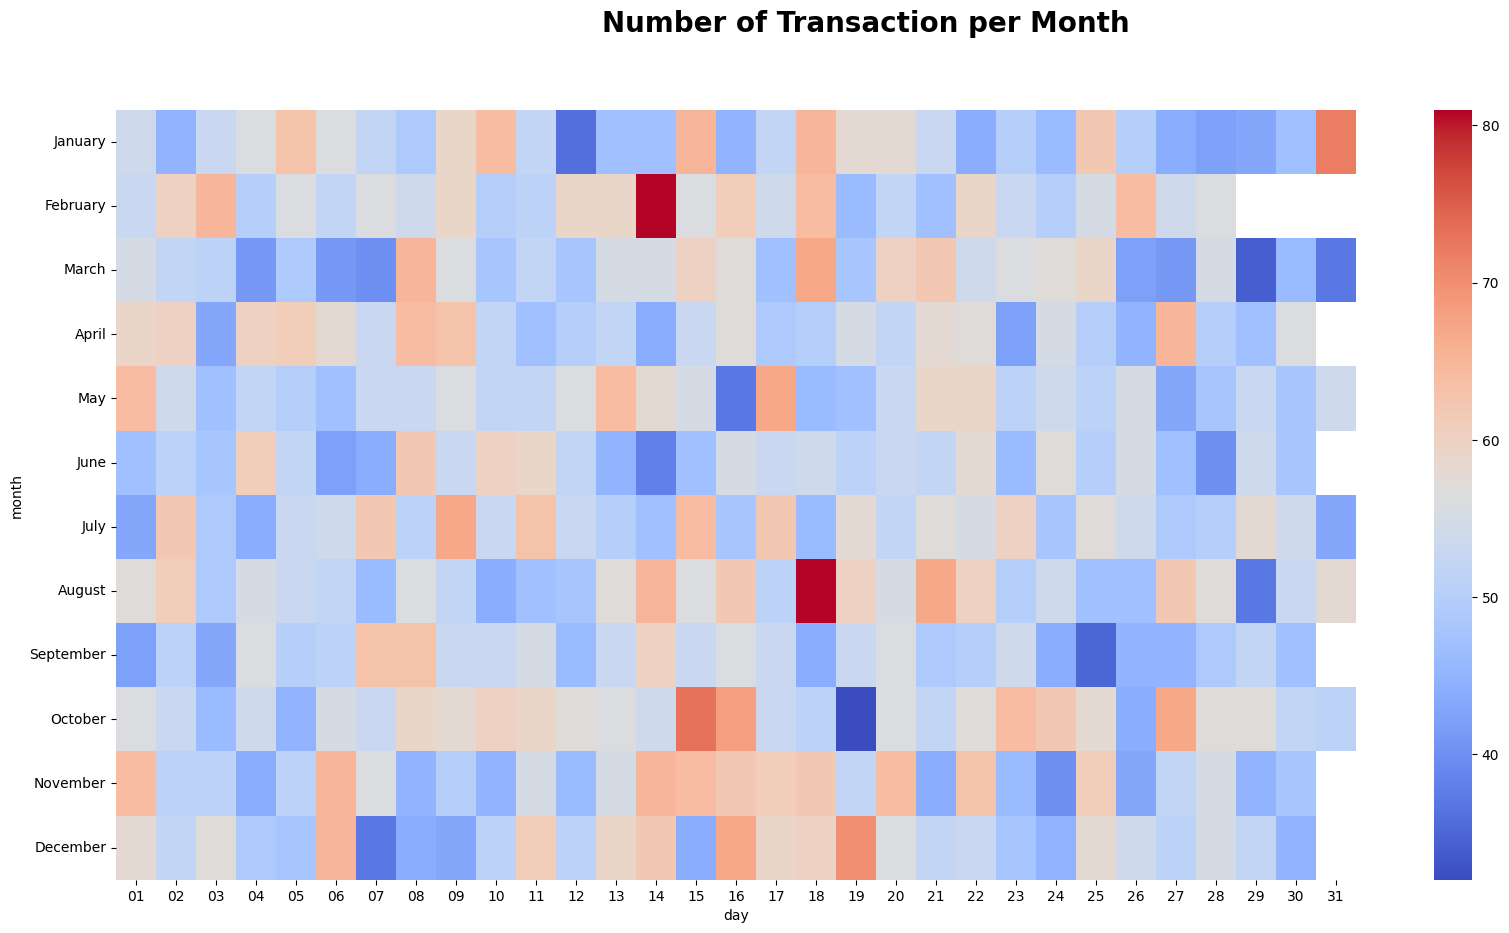

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Transaction per Month', fontsize=20, fontweight='bold')
map = month_daily_transaction.pivot('month', 'day', 'number_of_transaction')
sns.heatmap(map,cmap='coolwarm')

The number of transactions per day tends to fluctuate, with significant spikes on **February 14th** and **August 18th.**
****
**Daily Transaction Trend**

In [ ]:
daily_transaction = data_transaction.groupby(['transaction_weekday'])[['customer_id']].count()
daily_transaction.reset_index(inplace=True)
daily_transaction.columns = ['weekday','number_of_transaction']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transaction['weekday'] = pd.Categorical(daily_transaction['weekday'], weekday_order)
daily_transaction.sort_values('weekday', inplace=True)
daily_transaction

,weekday,number_of_transaction
1,Monday,2792
5,Tuesday,2764
6,Wednesday,2819
4,Thursday,2726
0,Friday,2718
2,Saturday,2771
3,Sunday,2803


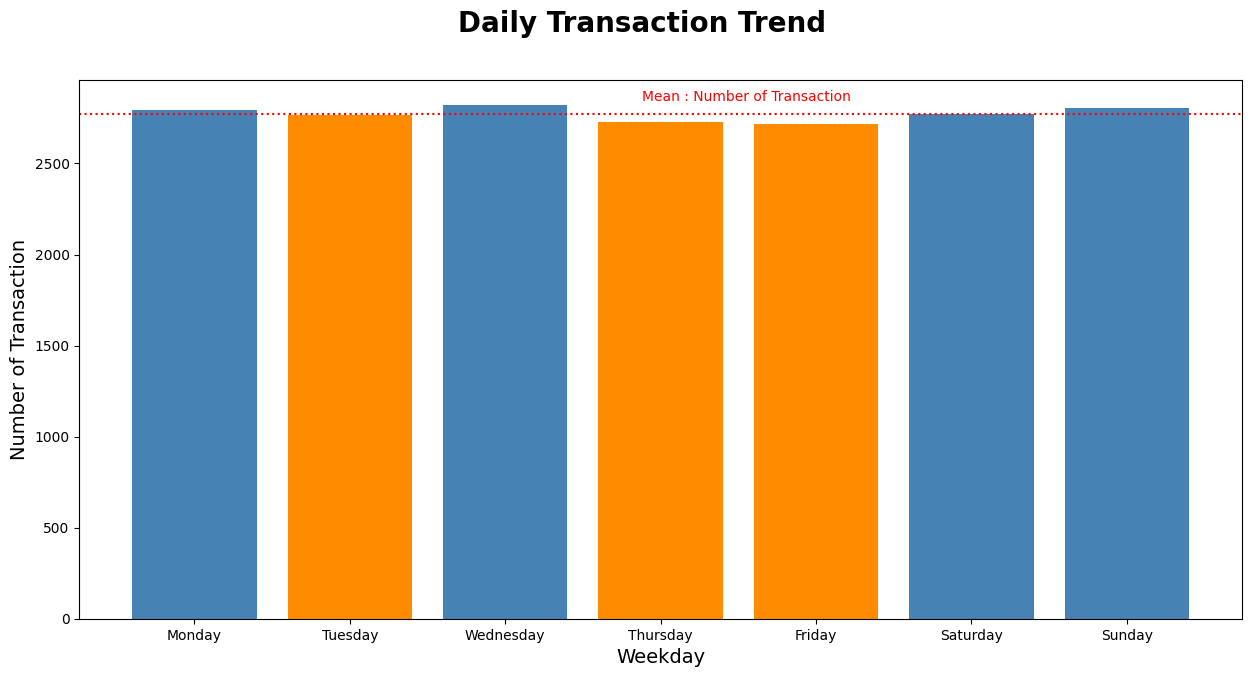

In [ ]:
# Visualization
fig = plt.figure(figsize=(15,7))

fig.suptitle('Daily Transaction Trend', fontsize=20, fontweight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Transaction', fontsize=14)

x = daily_transaction['weekday']
y = daily_transaction['number_of_transaction']
mean = y.mean()

colors = []
for value in daily_transaction['number_of_transaction']:
    if value < mean:
        colors.append('darkorange')
    else:
        colors.append('steelblue')

plt.bar(x, y, color=colors)
plt.axhline(y=mean, color='r', linestyle=':')
plt.text(0.5, 0.85, 'Mean : Number of Transaction', transform=fig.transFigure, color='r')
plt.show()

*  Overall, the number of daily transactions is **not significantly different.**
*  **Wednesday** is the busiest day.
*  **Thursday - Friday are above average**, when it comes to the weekend there is a decrease in transactions.
****
### **3. Product Data**

In [ ]:
data_product = data_merged.copy()

In [ ]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19393 entries, 0 to 19392
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19393 non-null  int64         
 1   product_id                           19393 non-null  int64         
 2   customer_id                          19393 non-null  int64         
 3   transaction_date                     19393 non-null  datetime64[ns]
 4   online_order                         19393 non-null  int64         
 5   brand                                19393 non-null  object        
 6   product_line                         19393 non-null  object        
 7   product_class                        19393 non-null  object        
 8   product_size                         19393 non-null  object        
 9   list_price                           19393 non-null  int64         
 10  standard_c

In [ ]:
stat = data_product[['brand', 'product_line', 'product_class', 'product_size']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

,count,unique,top,freq,% top
brand,19393,6,Solex,4160,21.451039
product_line,19393,4,Standard,13884,71.592843
product_class,19393,3,medium,13546,69.849946
product_size,19393,3,medium,12735,65.668025


*  The **brand most purchased** by customers is **Solex** with a percentage of **21.43%.**
*  The majority of customers **71.59% purchased Standard** bikes.
*  There are **69.84% of customers purchased a medium class** bikes.
*  There are **65.68% of customers purchased a medium size** bikes.

In [ ]:
# Brand Percentage
brand = data_product['brand'].value_counts().reset_index()
brand.columns = ['brand','count']
brand['percentage'] = (brand['count']/brand['count'].sum()*100).round(2)
brand

,brand,count,percentage
0,Solex,4160,21.45
1,Giant Bicycles,3237,16.69
2,WeareA2B,3236,16.69
3,OHM Cycles,2986,15.40
4,Trek Bicycles,2918,15.05
5,Norco Bicycles,2856,14.73


Text(0.5, 1.0, 'Percentage of Brand')

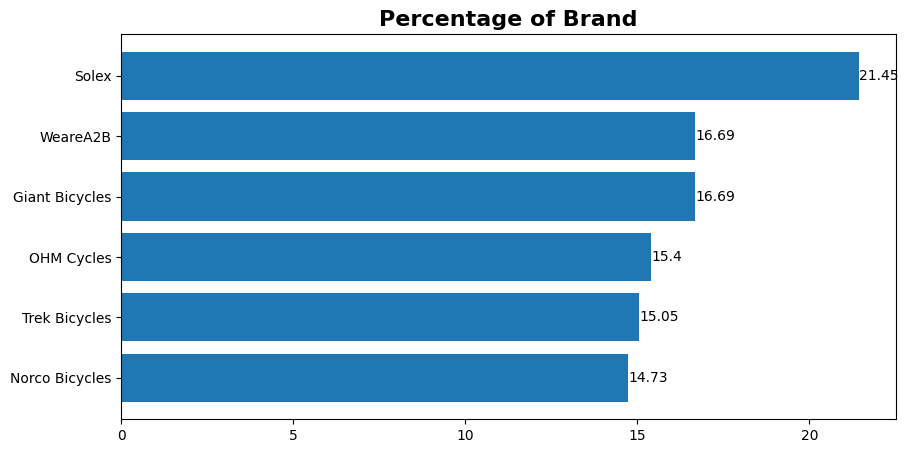

In [ ]:
# Visualization job industry
fig,ax = plt.subplots(figsize=(10,5))

brand_sort = brand.sort_values(by=['percentage']).reset_index(drop=True)

bars = plt.barh(y=brand_sort['brand'], width= brand_sort['percentage'])
plt.bar_label(ax.containers[0]) 
plt.title('Percentage of Brand', fontsize=16, fontweight='bold')

**Percentage of Product Line with Brand Distribution**

In [ ]:
line = data_product.groupby(['brand', 'product_line'])['product_line'].count()
line = line.reset_index(name='count')
line['percentage'] =  (100 * line['count'] / line.groupby('brand')['count'].transform('sum')).round(2)

pvt = line.pivot_table(columns='product_line', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                         percentage                  \
product_line   Mountain   Road Standard Touring   Mountain   Road Standard   
brand                                                                        
Giant Bicycles      0.0  569.0   2492.0   176.0       0.00  17.58    76.98   
Norco Bicycles    196.0  908.0   1752.0     0.0       6.86  31.79    61.34   
OHM Cycles          0.0  766.0   1994.0   226.0       0.00  25.65    66.78   
Solex               0.0  521.0   3440.0   199.0       0.00  12.52    82.69   
Trek Bicycles     218.0  967.0   1733.0     0.0       7.47  33.14    59.39   
WeareA2B            0.0  152.0   2473.0   611.0       0.00   4.70    76.42   

                        
product_line   Touring  
brand                   
Giant Bicycles    5.44  
Norco Bicycles    0.00  
OHM Cycles        7.57  
Solex             4.78  
Trek Bicycles     0.00  
WeareA2B         18.88

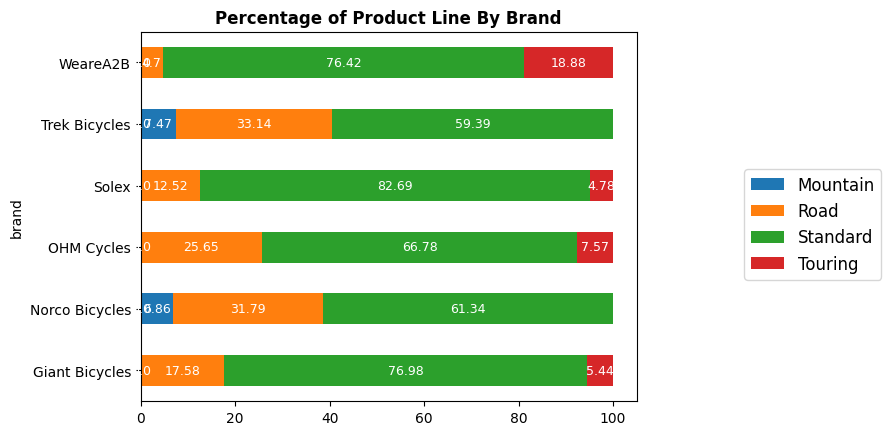

In [ ]:
#visualization
pvt_count = line.pivot_table(index='brand', columns='product_line', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Line By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')

plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

**Percentage of Product Class with Brand Distribution**

In [ ]:
clas = data_product.groupby(['brand', 'product_class'])['product_class'].count()
clas = clas.reset_index(name='count')
clas['percentage'] =  (100 * clas['count'] / clas.groupby('brand')['count'].transform('sum')).round(2)

pvt = clas.pivot_table(columns='product_class', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                percentage              
product_class    high    low  medium       high    low medium
brand                                                        
Giant Bicycles  765.0  192.0  2280.0      23.63   5.93  70.44
Norco Bicycles  557.0  616.0  1683.0      19.50  21.57  58.93
OHM Cycles      754.0  599.0  1633.0      25.25  20.06  54.69
Solex           555.0  400.0  3205.0      13.34   9.62  77.04
Trek Bicycles   318.0  767.0  1833.0      10.90  26.29  62.82
WeareA2B          0.0  324.0  2912.0       0.00  10.01  89.99

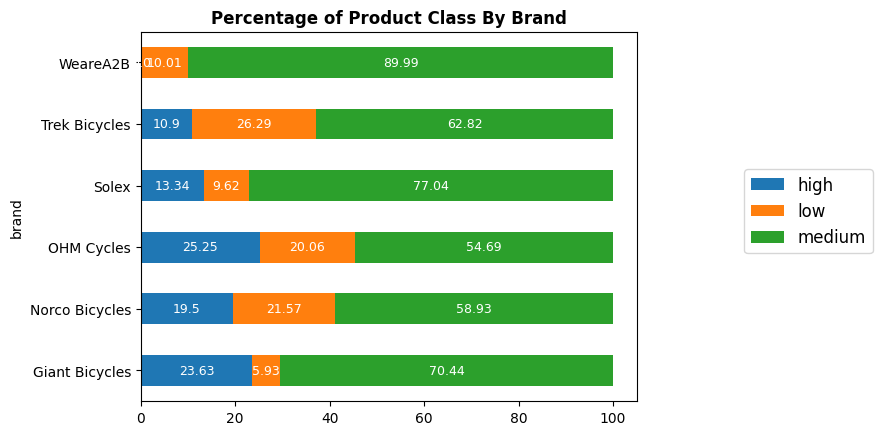

In [ ]:
pvt_count = clas.pivot_table(index='brand', columns='product_class', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Class By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

**Percentage of Product Size with Brand Distribution**

In [ ]:
size = data_product.groupby(['brand', 'product_size'])['product_size'].count()
size = size.reset_index(name='count')
size['percentage'] =  (100 * size['count'] / size.groupby('brand')['count'].transform('sum')).round(2)

pvt = size.pivot_table(columns='product_size', index='brand', values=['count', 'percentage'])
pvt

count              percentage              
product_size   large medium small      large medium  small
brand                                                     
Giant Bicycles   923   1743   571      28.51  53.85  17.64
Norco Bicycles   404   1703   749      14.15  59.63  26.23
OHM Cycles       193   2597   196       6.46  86.97   6.56
Solex           1063   2917   180      25.55  70.12   4.33
Trek Bicycles    884   1502   532      30.29  51.47  18.23
WeareA2B         423   2273   540      13.07  70.24  16.69

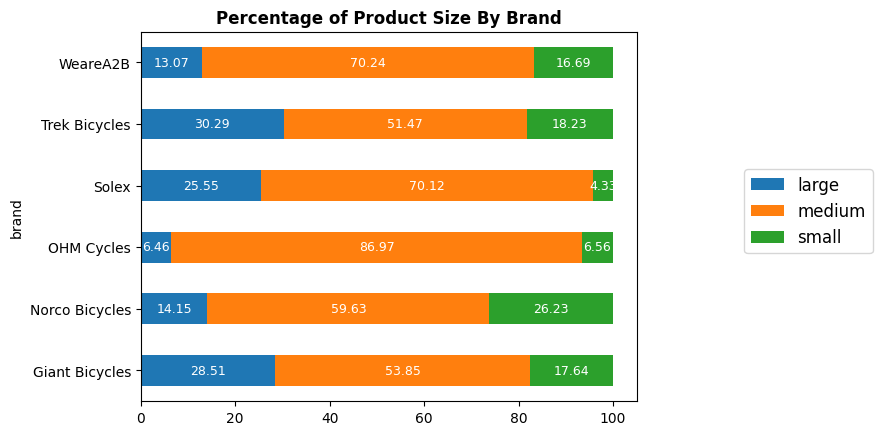

In [ ]:
pvt_count = size.pivot_table(index='brand', columns='product_size', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Size By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

### **3. Customer Data**

In [ ]:
data_cust = data_merged.copy()

In [ ]:
stat = data_cust[['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

,count,unique,top,freq,% top
gender,19393,2,Female,10161,52.395194
job_title,19393,195,Legal Assistant,244,1.258186
job_industry_category,19393,9,Manufacturing,4647,23.962254
wealth_segment,19393,3,Mass Customer,9740,50.224308
owns_car,19393,2,Yes,9781,50.435724
state,19393,3,NSW,10354,53.390399


*  There are **52.38%** of customers are female.
*  Customers have a **variety of job titles** with the top job title of **1.26% as Legal Assistants.**
*  There are **23.49%** of customers work in the **manufacturing industry.**
*  There are **50.26%** of customers come from **Mass Customers.**
*  There are **50.47%** of customers **having own car.**
*  The majority of customers, **53.37%, are from New South Wales.**
****
**Wealth Segment**

In [ ]:
# wealth segment percentage
wealth = data_cust['wealth_segment'].value_counts().reset_index()
wealth.columns = ['wealth_segment', 'count']
wealth['percentage'] = (wealth['count']/wealth['count'].sum()*100).round(2)
wealth

,wealth_segment,count,percentage
0,Mass Customer,9740,50.22
1,High Net Worth,4955,25.55
2,Affluent Customer,4698,24.23


**State**

In [ ]:
# state percentage
state = data_cust['state'].value_counts().reset_index()
state.columns = ['state', 'count']
state['percentage'] = (state['count']/state['count'].sum()*100).round(2)
state

,state,count,percentage
0,NSW,10354,53.39
1,VIC,4903,25.28
2,QLD,4136,21.33


**Job Industry**

In [ ]:
# job industry percentage
industry = data_cust['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry', 'count']
industry['percentage'] = (industry['count']/industry['count'].sum()*100).round(2)
industry

,job_industry,count,percentage
0,Manufacturing,4647,23.96
1,Financial Services,4481,23.11
2,Health,3571,18.41
3,Retail,2041,10.52
4,Property,1505,7.76
5,IT,1273,6.56
6,Entertainment,803,4.14
7,Argiculture,667,3.44
8,Telecommunications,405,2.09


In [ ]:
# top 10 job title
title = data_cust['job_title'].value_counts().reset_index()
title.columns = ['job_title', 'count']
title['percentage'] = (title['count']/title['count'].sum()*100).round(2)
top10title = title.head(10)
top10title

,job_title,count,percentage
0,Legal Assistant,244,1.26
1,Business Systems Development Analyst,239,1.23
2,Social Worker,235,1.21
3,Chemical Engineer,234,1.21
4,Assistant Professor,232,1.20
5,Internal Auditor,226,1.17
6,Executive Secretary,226,1.17
7,Recruiter,219,1.13
8,Information Systems Manager,217,1.12
9,Product Engineer,216,1.11


## **RFM ANALYSIS - Recency, Frequency, and Monetary Analysis**
****
RFM analysis is a customer segmentation technique commonly used in marketing and customer relationship management (CRM). It stands for Recency, Frequency, and Monetary Value. RFM analysis helps businesses categorize their customers into different segments based on their purchasing behavior.

## 1. Data Preparation
Before segmenting, we must find the recency, frequency, and monetary values. To get the recency value, we have to calculate the **last purchase from the transaction_date column.** And to get the monetary value, we have to create a **new profit column.**

In [ ]:
data_rfm = data_merged.copy()

In [ ]:
data_rfm.sample(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class,state,property_valuation
5085,19120,94,2309,2017-09-15,1,Giant Bicycles,Standard,medium,large,1635,...,Male,40,Accounting Assistant I,Manufacturing,Affluent Customer,No,14,40,QLD,5
4872,1428,53,1082,2017-07-08,1,OHM Cycles,Standard,medium,medium,795,...,Female,90,Financial Analyst,Financial Services,Mass Customer,Yes,16,40,QLD,9
604,703,24,211,2017-10-02,1,Solex,Road,medium,large,1777,...,Female,6,VP Marketing,Manufacturing,Mass Customer,Yes,5,50,NSW,10


In [ ]:
# making last purchase column for recency
most_recent_purchase = data_rfm['transaction_date'].max()
data_rfm['last_purchase_days_ago'] = most_recent_purchase - data_rfm['transaction_date']
data_rfm['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
data_rfm['last_purchase_days_ago'] = data_rfm['last_purchase_days_ago'].astype('int64')

# making column for monetary
data_rfm['profit'] = data_rfm['list_price'] - data_rfm['standard_cost']

## 2. Data Aggregation

RFM is a basic customer segmentation algorithm based on their purchasing behaviour. The behaviour is identified by using only three customer data points:

1.  The recency value of each customer is obtained from the smallest recency value from the dataset.
2.  The frequency value of each customer is obtained from the count of transactions they place.
3.  The monetary value of each customer is obtained from the profit (list_price - standard_cost).

In [ ]:
# making rfm table
rfm_table = data_rfm.groupby('customer_id').agg({'last_purchase_days_ago': lambda x: x.min(),
                                                    'customer_id': lambda x: len(x),
                                                    'profit': lambda x: x.sum()})

rfm_table.rename(columns={'last_purchase_days_ago': 'recency', 
                          'customer_id': 'frequency', 
                          'profit': 'monetary'}, inplace=True)

In [ ]:
rfm_table

,recency,frequency,monetary
customer_id,,,
1,7,11,3016
2,128,3,2226
4,195,2,221
5,16,6,2394
6,64,5,3946
...,...,...,...
3496,256,4,2045
3497,52,3,1649
3498,127,6,3147


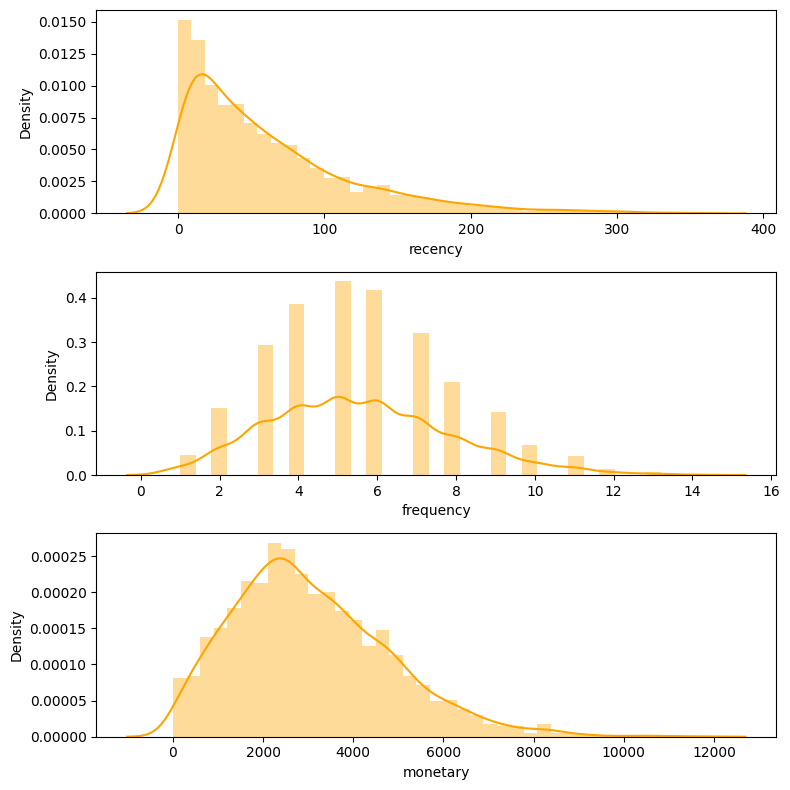

In [ ]:
# looking distribution
rfm = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(8, 8))
for i in range(0, len(rfm)):
    plt.subplot(len(rfm), 1, i+1)
    sns.distplot(rfm_table[rfm[i]], color='orange')
    plt.tight_layout()

All data looks right-skewed.
****
## 3. Scoring
The **qcut** function will calculate the score in the column according to the quartile calculation, the output is a range of 1-5. Customers **get more points if they make frequent purchases, make a lot of purchases, and spend a lot of money.**

In [ ]:
# Recency, if the transaction happened recently give 5 points . 
rfm_table['R_score'] = pd.qcut(rfm_table['recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency, 5 = Most frequent , 1 = rarely
rfm_table['F_score'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetery, 5 = best, 1 = least
rfm_table['M_score'] = pd.qcut(rfm_table['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_table.head(5)

,recency,frequency,monetary,R_score,F_score,M_score
customer_id,,,,,,
1,7,11,3016,5,5,3
2,128,3,2226,1,1,2
4,195,2,221,1,1,1
5,16,6,2394,4,3,2
6,64,5,3946,2,2,4


Calculate the overall RFM score This step can be done in two ways:

*  **Concatenation :** creating segments Here we just concatenate (not add) individual RFM scores like strings and get labeled segments in return. The highest is 555 and the lowest is 111.
*  **Addition :** creates a score, here we find the average of the individual RFM scores indicating the customer's score. Highest 5 and lowest 1.

In [ ]:
# creating rfm score
# RFM_segment is a string contain of 'R_score','F_score' and 'M_score'.
rfm_table['RFM_segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str) + rfm_table['M_score'].astype(str)

# RFM_score is the average of 'R_score','F_score' and 'M_score'.
rfm_table['RFM_score'] = ((rfm_table['R_score'].astype('int64') + rfm_table['F_score'].astype('int64') + rfm_table['M_score'].astype('int64')) / 3).round(2)

In [ ]:
rfm_table.sample(3)

,recency,frequency,monetary,R_score,F_score,M_score,RFM_segment,RFM_score
customer_id,,,,,,,,
2919,21,6,3490,4,4,4,444,4.00
3432,106,8,3709,1,5,4,154,3.33
90,30,7,2991,4,4,3,443,3.67


## 4. Segmentation and Score Labeling

After calculations on the RFM data we can create customer segments:

| **Segment** | **Interpretation** |
|----|----|
| **Champions** | Bought recently, buy often and spend the most. |
| **Loyal customers**| Buy on a regular basis. Responsive to promotions. |
| **Potential loyalist** | Recent customers with average frequency. |
| **Recent customers** | Bought most recently, but not often. |
| **Promising** | Recent shoppers, but haven’t spent much. |
| **Needs attention** | Above average recency, frequency and monetary values. May not have bought very recently though. |
| **About to sleep** | Below average recency and frequency. Will lose them if not reactivated. |
| **At risk** | Some time since they’ve purchased. Need to bring them back! |
| **Can’t lose them** | Used to purchase frequently but haven’t returned for a long time. |
| **Hibernating** | Last purchase was long back and low number of orders. May be lost. |

We will use Recency and Frequency to segment our customers and determined how to segment customers using regex.

In [ ]:
# creating segment
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [ ]:
# applying segment
rfm_table['Segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

Customer score:

| **Score** | RFM_Score |
|---|---|
| **Diamond** | 5 - 4.1 |
| **Platinum** | 4 - 3.1 |
| **Gold** | 3 - 2.1 |
| **Silver** | 2 - 1.1 |
| **Bronze** | 1 - 0 |

In [ ]:
# create labels for the scores
rfm_table['Score'] = np.where(rfm_table['RFM_score'] > 4, 'Diamond',
                              np.where(rfm_table['RFM_score'] > 3, 'Platinum',
                                       np.where(rfm_table['RFM_score'] > 2, 'Gold',
                                                np.where(rfm_table['RFM_score'] > 1, 'Silver',
                                                         'Bronze'))))

In [ ]:
rfm_table.sample(4)

,recency,frequency,monetary,R_score,F_score,M_score,RFM_segment,RFM_score,Segment,Score
customer_id,,,,,,,,,,
595,184,3,2012,1,1,2,112,1.33,Hibernating,Silver
349,166,5,1669,1,2,2,122,1.67,Hibernating,Silver
900,12,4,780,5,2,1,521,2.67,Potential Loyalists,Gold
1481,20,8,2551,4,5,3,453,4.00,Loyal Customers,Platinum


## 5. Analysis

### 5.1. Statistical Summary

**Recency vs Frequency**

In [ ]:
rfm_data = rfm_table.reset_index().copy()

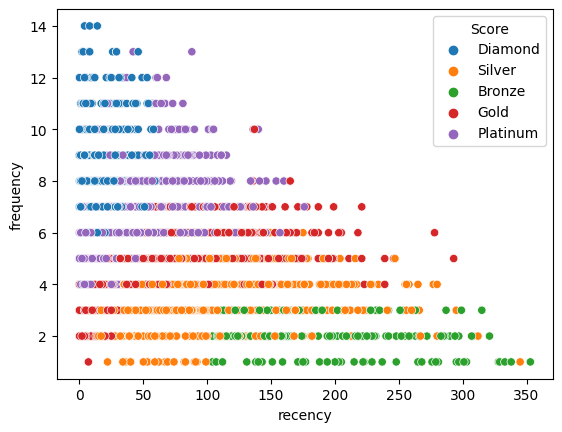

In [ ]:
data = pd.DataFrame(data=rfm_data,columns=['customer_id','Score','recency','frequency','monetary'])

# plot data with seaborn
facet = sns.scatterplot(data=data, x='recency', y='frequency', hue='Score', palette='tab10')

A **high frequency** is found with customers who have a **recent purchase within average of two months.**
****
**Monetery vs Frequency**

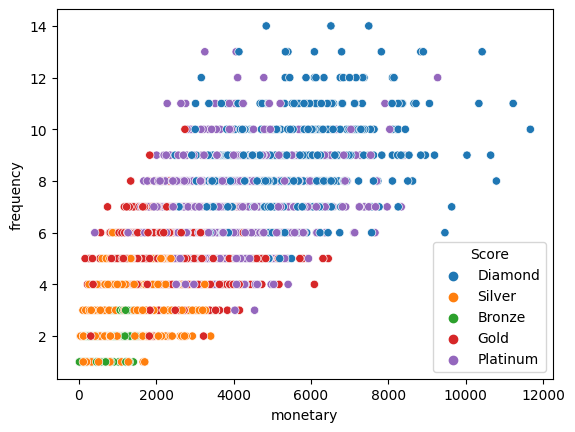

In [ ]:
# plot data with seaborn
facet = sns.scatterplot(data=data, x='monetary', y='frequency', hue='Score', palette='tab10')

Customers who **buy frequently spend less money.**
****
**Recency vs Frequency vs Monetary**

In [ ]:
# rfm_data['Score'] = rfm_data['Score'].astype(str)
import plotly.express as px

plt.figure(figsize=(20, 20))

fig = px.scatter_3d(rfm_data,x='recency', y='frequency', z='monetary',
              color='Score', opacity=0.9,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<Figure size 2000x2000 with 0 Axes>

In the above plot, the color specifies Cluster. From the above plot, we can see how the customers are spread among Recency, Frequency and Monetary dimension.
****
**Score**

In [ ]:
# create agg dictionary
agg_dict = {'customer_id': 'count', 
            'recency': 'mean',
            'frequency': 'mean',
            'monetary': 'mean'}

In [ ]:
score_cat =['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
rfm_data['Score'] = pd.Categorical(rfm_data['Score'], categories = score_cat)

df_sc = rfm_data.groupby('Score').agg(agg_dict).reset_index()
df_sc.rename({'Score': 'Score', 'customer_id': 'count'}, axis=1, inplace=True)
df_sc['count %'] = (100 * df_sc['count'] / df_sc['count'].sum()).round(2)
df_sc['monetary %'] = (100 * df_sc['monetary'] / df_sc['monetary'].sum()).round(2)
df_sc

,Score,count,recency,frequency,monetary,count %,monetary %
0,Diamond,579,17.734024,8.597582,5363.842832,16.62,38.54
1,Platinum,1040,39.968269,6.569231,3741.057692,29.85,26.88
2,Gold,992,60.991935,4.867944,2492.681452,28.47,17.91
3,Silver,680,101.439706,3.444118,1608.254412,19.52,11.56
4,Bronze,193,187.865285,2.134715,710.533679,5.54,5.11


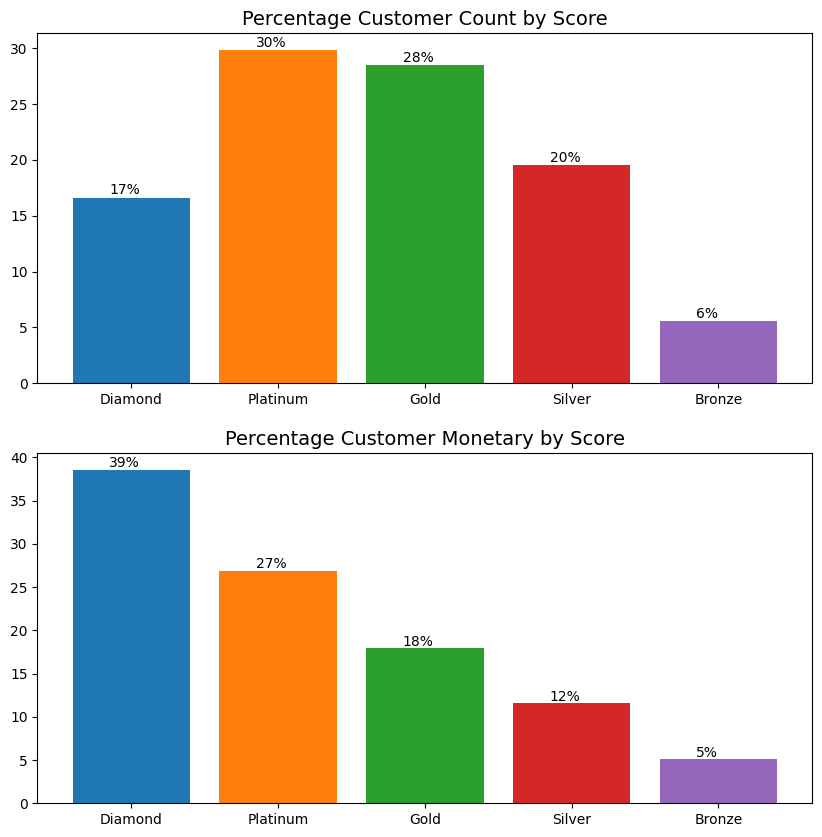

In [ ]:
# bar chart - count
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax[0].bar(x='Score', height='count %', data=df_sc, color=sns.color_palette('tab10'))
ax[1].bar(x='Score', height='monetary %', data=df_sc, color=sns.color_palette('tab10'))

ax[0].set_ylabel('')
ax[0].set_title('Percentage Customer Count by Score', fontsize=14)

ax[1].set_ylabel('')
ax[1].set_title('Percentage Customer Monetary by Score', fontsize=14)

for p in ax[0].patches:
    ax[0].annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.3))
for p in ax[1].patches:
    ax[1].annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.3))

*  **Most of customers are Platinum** with a percentage of **profit contribution (monetary) of 27%.**
*  Customers who contribute the **most to generating the highest profit are Diamond,** which is 39%. However, the **number of these customers is low** enough which is only 17%.
****
**Segment**

In [ ]:
df_seg = rfm_data.groupby('Segment').agg(agg_dict).reset_index()
df_seg.rename({'Segment': 'Segment', 'customer_id': 'count'}, axis=1, inplace=True)
df_seg['count %'] = (100 * df_seg['count'] / df_seg['count'].sum()).round(2)
df_seg['monetary %'] = (100 * df_seg['monetary'] / df_seg['monetary'].sum()).round(2)
df_seg.sort_values(by='count', ascending=False, inplace=True)
df_seg

,Segment,count,recency,frequency,monetary,count %,monetary %
4,Hibernating,748,135.304813,3.209893,1755.254011,21.47,6.01
5,Loyal Customers,651,34.671275,7.821813,4362.860215,18.69,14.93
8,Potential Loyalists,539,14.716141,4.907236,2706.910946,15.47,9.26
1,At Risk,497,103.772636,5.881288,3309.824950,14.27,11.32
3,Champions,381,6.913386,8.099738,4472.490814,10.94,15.30
0,About to Sleep,228,46.008772,3.592105,1867.969298,6.54,6.39
2,Can't Loose,142,86.985915,8.697183,4507.105634,4.08,15.42
6,Need Attention,137,45.262774,5.459854,2988.379562,3.93,10.22
9,Promising,91,22.802198,2.758242,1683.758242,2.61,5.76
7,New Customers,70,7.685714,2.757143,1573.371429,2.01,5.38


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


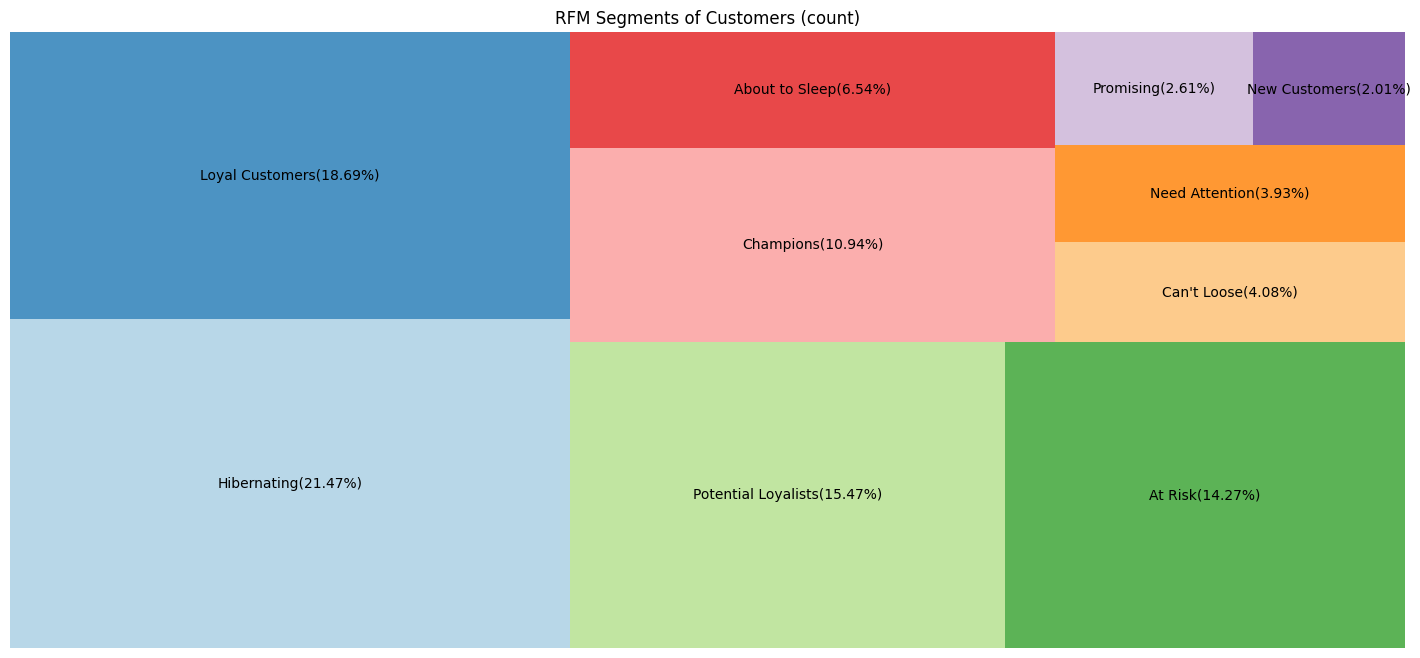

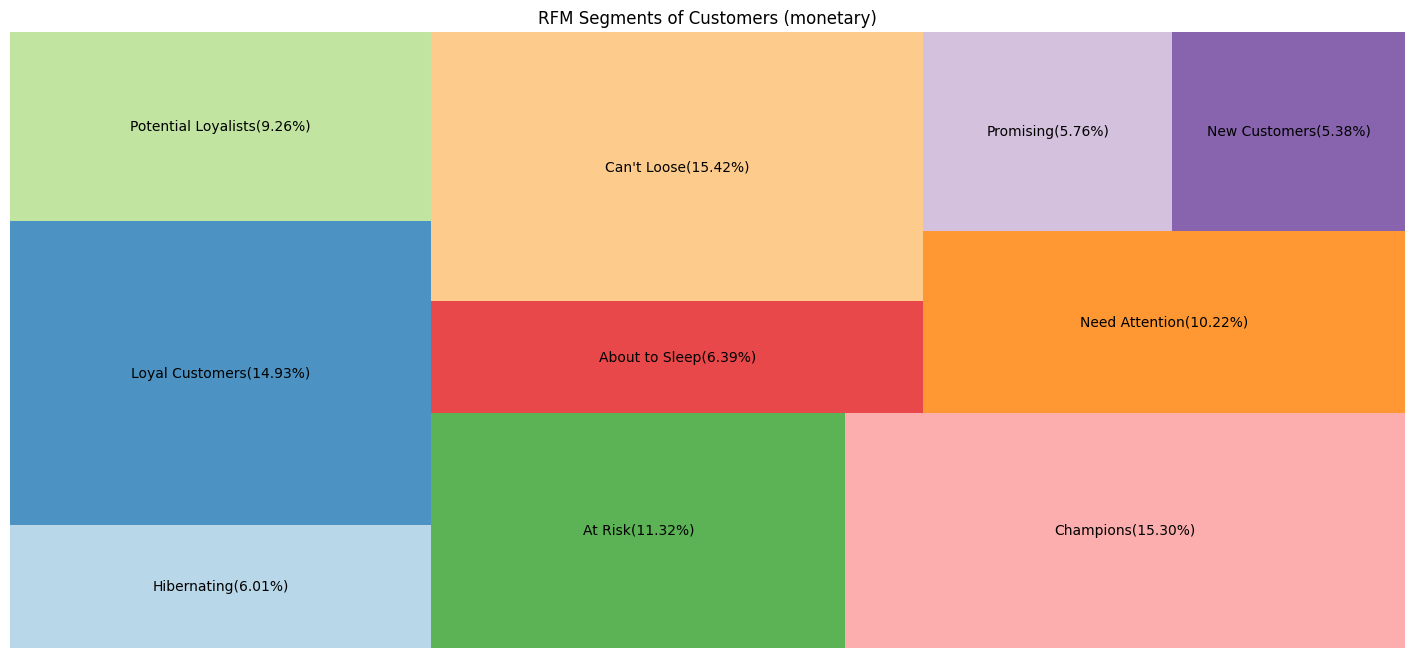

In [ ]:
import squarify
import matplotlib.pyplot as plt

for col in ['count', 'monetary']:
    labels = df_seg['Segment'] + df_seg[col + ' %'].apply(lambda x: '({0:.2f}%)'.format(x))

    fig, ax = plt.subplots(figsize=(18,8))
    squarify.plot(sizes=df_seg[col], label=labels, alpha=.8, color=sns.color_palette('Paired', len(df_seg)))
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

* Most of customers are in the **Hibernating, Loyal Customers, and Potential Loyalist.**
* Most of profit comes from the segment of **Can't Loose, Champions, and Loyal Customers.**
****
### 5.2. Interpretation

In [ ]:
# Aggregate data by each customer
rfm1 = rfm_data.groupby(['Score','Segment'])['Segment'].count()
rfm1 = rfm1.reset_index(name='count')
rfm1['percentage'] =  (100 * rfm1['count'] / rfm1.groupby('Score')['count'].transform('sum')).round(2)
# rfm1
pvt = rfm1.pivot_table(index='Score', columns='Segment', values='percentage')
pvt

Segment,About to Sleep,At Risk,Can't Loose,Champions,Hibernating,Loyal Customers,Need Attention,New Customers,Potential Loyalists,Promising
Score,,,,,,,,,,
Diamond,0.00,0.00,0.00,50.26,0.00,46.98,0.00,0.00,2.76,0.00
Platinum,0.19,11.63,12.50,8.65,0.00,33.56,5.67,0.19,27.50,0.10
Gold,10.69,31.75,1.21,0.00,10.08,3.02,7.86,6.85,23.89,4.64
Silver,17.65,8.97,0.00,0.00,66.91,0.00,0.00,0.00,0.00,6.47
Bronze,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00


|Customer Score|%|RFM Segment|RFM Interpretation|Actionable Insight|
|---|---|---|---|---|
|Diamond|17%|50% Champions; 47% Loyal Customers|Customers who transacted recently, buy often, with a high or low amount of monetary spending. The majority of Diamond customers are Champions and Loyal Customers.| To retain champion customers, companies can reward them. And to convert Loyal Customers into Champion customers, the company should engage them more frequently, ask for reviews, or upsell higher-value products.|
|Platinum|30%|35% Loyal Customers; 27% Potential Loyalists|Customers who made their last transaction some time ago, spend a good amount and purchase more than once or often. RFM segmentation shows that 35% of them are Loyal Customers and 27% are Potential Loyalists.| Companies should offer loyalty programs with benefits like points or discounts for customers and recommend other products to them.|
|Gold|28%|32% At Risk|Customers who spend big money and purchase often but haven't purchased for a long time. RFM segmentation in Gold customer shows that majority 32% of them are At Risk|Companies should bring them back by sending personalized emails or newsletters to reconnect and offer promotions or discounts.|
|Silver|20%|66% Hibernating|Customers who made their last transaction a long time ago, and who have made few purchases. RFM segmentation shows that majority of Silver customers are Hibernating.|Offer other personalized or relevant products, and give more special discount.|
|Bronze|6%|100% Hibernating|Can identify as a lost customer. Lowest recency, frequency, and monetary scores.| Companies can revive interest with outreach campaigns or ignore them otherwise.|

****
## 6. Customer Demographic Analysis Based on RFM

In [ ]:
# copy customer demographic dataset
df_customer = demo_addr.copy()

We will attach RFM and scoring labels to the customer demographics dataset and we will conduct further analysis on customer characteristics that have potential for marketing strategies.

In [ ]:
rfm_data1 = rfm_data[['customer_id', 'RFM_score', 'Score', 'Segment']].copy()

In [ ]:
# merge dataset by id customers
df_allcust = pd.merge(df_customer, rfm_data1, on = 'customer_id')

In [ ]:
df_allcust.sample(3)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class,state,property_valuation,RFM_score,Score,Segment
2449,2461,Male,89,Speech Pathologist,Manufacturing,Affluent Customer,No,17,50,NSW,9,3.33,Platinum,Loyal Customers
1160,1170,Female,62,Assistant Professor,IT,Mass Customer,Yes,4,60,QLD,9,3.00,Gold,At Risk
2945,2959,Female,1,Registered Nurse,Health,Mass Customer,Yes,11,70,QLD,5,1.33,Silver,Hibernating


## Statistical Summary of All Customers
### **Numerical Columns**

In [ ]:
df_allcust.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
customer_id,3484.0,1752.07,1008.88,1.0,879.75,1752.5,2624.25,3500.0
past_3_years_bike_related_purchases,3484.0,48.78,28.62,0.0,24.00,48.0,73.00,99.0
tenure,3484.0,10.68,5.67,1.0,6.00,11.0,15.25,22.0
age_class,3484.0,45.10,13.10,20.0,40.00,40.0,60.00,80.0
property_valuation,3484.0,7.51,2.82,1.0,6.00,8.0,10.00,12.0
RFM_score,3484.0,3.01,1.10,1.0,2.00,3.0,4.00,5.0


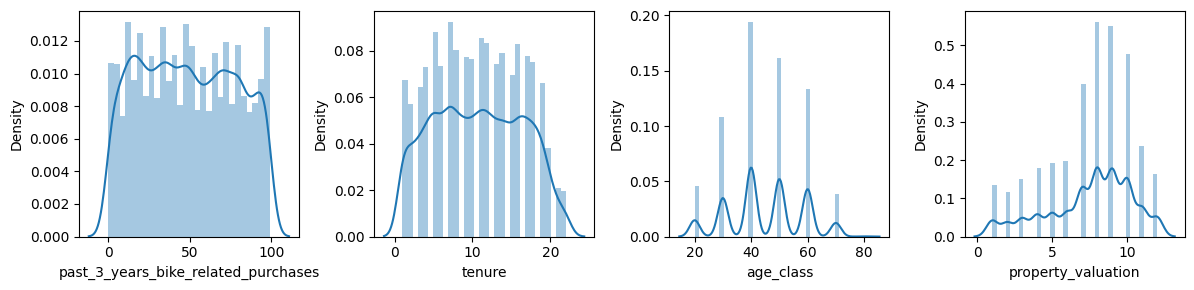

In [ ]:
# looking distribution
nums = ['past_3_years_bike_related_purchases', 'tenure', 'age_class', 'property_valuation']
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(data_merged[nums[i]])
    plt.tight_layout()

<Axes: >

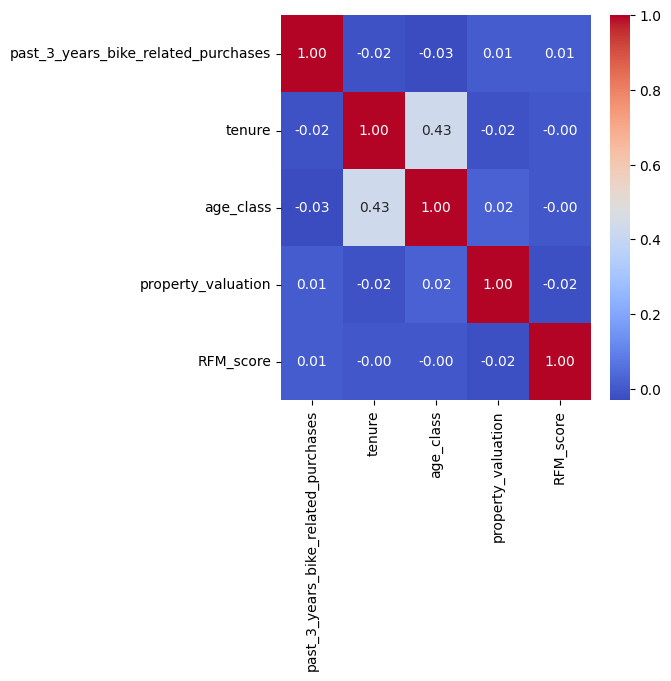

In [ ]:
# multivariate analysis
nums = ['past_3_years_bike_related_purchases', 'tenure', 'age_class', 'property_valuation', 'RFM_score']
plt.figure(figsize = (5,5))
sns.heatmap(df_allcust[nums].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')

* Overall, the numerical columns above have a low correlation with the RFM score.
* The age_class column has a high positive correlation with tenure. This means that the older the age of the customer, the greater the tenure numbers.
****
### **Categorical Columns**

In [ ]:
cats = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'Segment']
df_allcust[cats].describe().T

,count,unique,top,freq
gender,3484,2,Female,1832
job_industry_category,3484,9,Manufacturing,839
wealth_segment,3484,3,Mass Customer,1742
owns_car,3484,2,Yes,1766
state,3484,3,NSW,1863
Segment,3484,10,Hibernating,748


In [ ]:
# multivariate analysis
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (np.sqrt(stat/(obs*mini)))

In [ ]:
from scipy.stats import chi2_contingency

cats = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'Score', 'Segment', 'RFM_score']

rows = []
for var1 in df_allcust[cats]:
    col = []
    for var2 in df_allcust[cats]:
        cramers = cramers_V(df_allcust[cats][var1], df_allcust[cats][var2])
        col.append(round(cramers,2))
    rows.append(col)

cramers_result = np.array(rows)
tabel_corelation_categorical = pd.DataFrame(cramers_result, columns = df_allcust[cats].columns, index = df_allcust[cats].columns)

<Axes: >

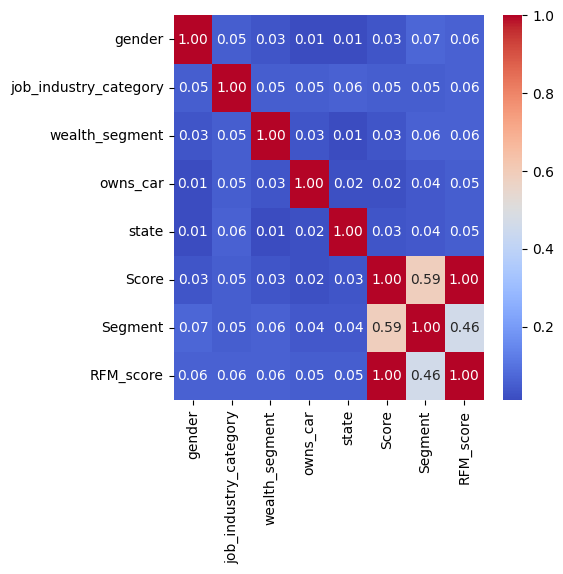

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(tabel_corelation_categorical, cmap = 'coolwarm', annot = True, fmt = '.2f')

Similar to the numerical column, the categorical column also has a low correlation with the RFM score.
****
## 7. Targeted Customer Demographic
We decided to focus on exploring insight Diamond Customers that generate the most profit for the company.

In [ ]:
# filtering data Diamond Customers
df_target = df_allcust[df_allcust['Score'] == 'Diamond']

In [ ]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 3482
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          579 non-null    int64   
 1   gender                               579 non-null    object  
 2   past_3_years_bike_related_purchases  579 non-null    int64   
 3   job_title                            579 non-null    object  
 4   job_industry_category                579 non-null    object  
 5   wealth_segment                       579 non-null    object  
 6   owns_car                             579 non-null    object  
 7   tenure                               579 non-null    int64   
 8   age_class                            579 non-null    int64   
 9   state                                579 non-null    object  
 10  property_valuation                   579 non-null    int64   
 11  RFM_score         

### 7.1 Statistical Summary of Diamond Customers
**Numerical Columns**

In [ ]:
df_target.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
customer_id,579.0,1743.23,1017.88,1.00,839.50,1763.00,2635.00,3499.0
past_3_years_bike_related_purchases,579.0,48.81,28.61,0.00,24.50,48.00,73.00,99.0
tenure,579.0,10.58,5.91,1.00,5.50,11.00,16.00,22.0
age_class,579.0,44.16,13.17,20.00,30.00,40.00,50.00,70.0
property_valuation,579.0,7.49,2.79,1.00,6.00,8.00,9.00,12.0
RFM_score,579.0,4.60,0.26,4.33,4.33,4.67,4.67,5.0


**Categorical Columns**

In [ ]:
cats = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'Score', 'Segment']
df_target[cats].describe().T

,count,unique,top,freq
gender,579,2,Female,294
job_industry_category,579,9,Financial Services,144
wealth_segment,579,3,Mass Customer,292
owns_car,579,2,Yes,291
state,579,3,NSW,300
Score,579,1,Diamond,579
Segment,579,3,Champions,291


### 7.2. Analyzing and Viasualizing Distribution of Diamond Customers
**Diamond Customers Gender**

In [ ]:
# percentage gender
gender = df_target['gender'].value_counts().reset_index()
gender.columns = ['gender', 'count']
gender['percentage'] = (gender['count']/gender['count'].sum()*100).round(2)
gender

,gender,count,percentage
0,Female,294,50.78
1,Male,285,49.22


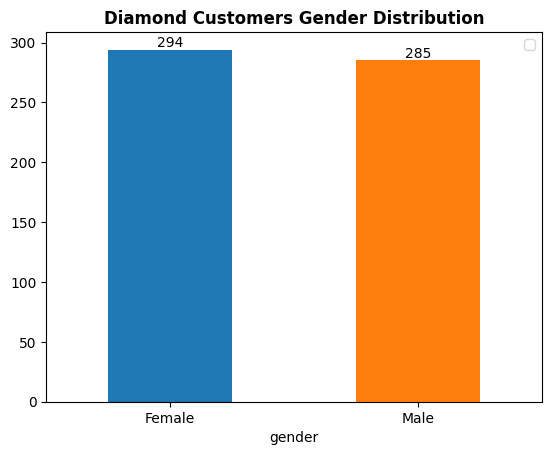

In [ ]:
# calculating data
group = df_target.groupby(['gender'])['customer_id'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='gender', y='count', color=sns.color_palette('tab10'))
plt.title('Diamond Customers Gender Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

From the graph, it can be seen that the difference between the number of **female and male customers is not significant.** We will compare gender with other variables.

Text(0.5, 1.0, 'Diamond Customers Gender \nvs Median Tenure Distributions')

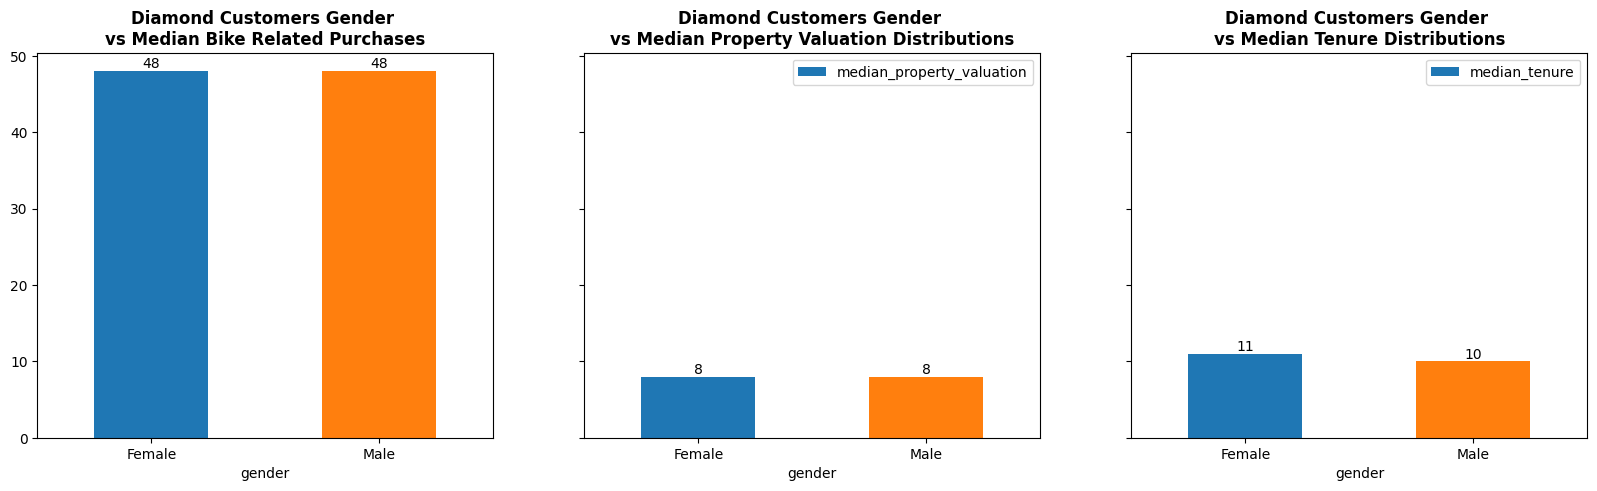

In [ ]:
# calculating value
bike = df_target.groupby(['gender'])['past_3_years_bike_related_purchases'].median().reset_index(name='median_past_3_years_bike_related_purchases')
properti = df_target.groupby(['gender'])['property_valuation'].median().reset_index(name='median_property_valuation')
tenure = df_target.groupby(['gender'])['tenure'].median().reset_index(name='median_tenure')

# visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
ax1 = bike.plot(kind='bar', x='gender', y='median_past_3_years_bike_related_purchases', color=sns.color_palette('tab10'), ax=axes[0])
ax2 = properti.plot(kind='bar', x='gender', y='median_property_valuation', color=sns.color_palette('tab10'), ax=axes[1])
ax3 = tenure.plot(kind='bar', x='gender', y='median_tenure', color=sns.color_palette('tab10'), ax=axes[2])

# giving label
axes[0].bar_label(ax1.containers[0]) 
axes[1].bar_label(ax2.containers[0]) 
axes[2].bar_label(ax3.containers[0])

axes[0].legend().remove()
plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels() + ax3.get_xticklabels(), rotation=360)
axes[0].set_title('Diamond Customers Gender \nvs Median Bike Related Purchases', fontweight='bold')
axes[1].set_title('Diamond Customers Gender \nvs Median Property Valuation Distributions', fontweight='bold')
axes[2].set_title('Diamond Customers Gender \nvs Median Tenure Distributions', fontweight='bold')

This information shows that gender has little effect on Diamond's customer indicators.

**Diamond Customers Gender with Age**

In [ ]:
# percentage age
age = df_target['age_class'].value_counts().reset_index()
age.columns = ['age_class', 'count']
age['percentage'] = (age['count']/age['count'].sum()*100).round(2)
age

,age_class,count,percentage
0,40,164,28.32
1,50,132,22.80
2,60,107,18.48
3,30,102,17.62
4,20,45,7.77
5,70,29,5.01


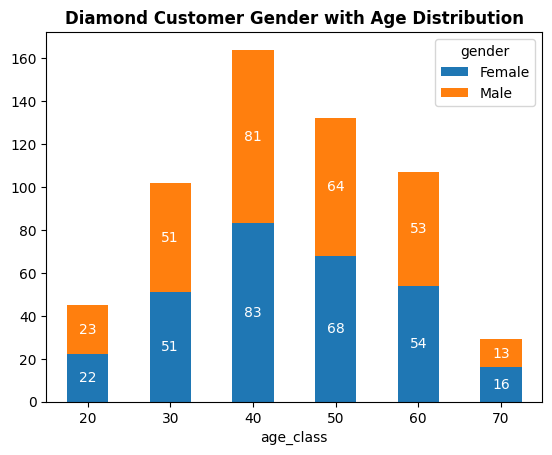

In [ ]:
# calculating data
group = df_target.groupby(['age_class', 'gender'])['customer_id'].count()
group = group.reset_index(name='count')
pvt = group.pivot_table(index='age_class', columns='gender', values='count')

# creating visualization
ax = pvt.plot(kind='bar', stacked=True)
plt.title('Diamond Customer Gender with Age Distribution', fontweight='bold')
plt.xticks(rotation=360)

# showing label in bars
for p in ax.patches:
    left, bottom, width, height =  p.get_bbox().bounds
    if height > 0 :
        ax.annotate("{0:.0f}".format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='w')

Most customers are in the age class **40 - 50**, it can be interpreted that the highest frequency of Diamond customers in the age **range 36 - 55.** From this graph it can also be seen that gender has an almost equal distribution.
****
**Diamond Customers Wealth Segment with Age**

In [ ]:
# percentage wealth
wealth = df_target['wealth_segment'].value_counts().reset_index()
wealth.columns = ['wealth_segment', 'count']
wealth['percentage'] = (wealth['count']/wealth['count'].sum()*100).round(2)
wealth

,wealth_segment,count,percentage
0,Mass Customer,292,50.43
1,High Net Worth,158,27.29
2,Affluent Customer,129,22.28


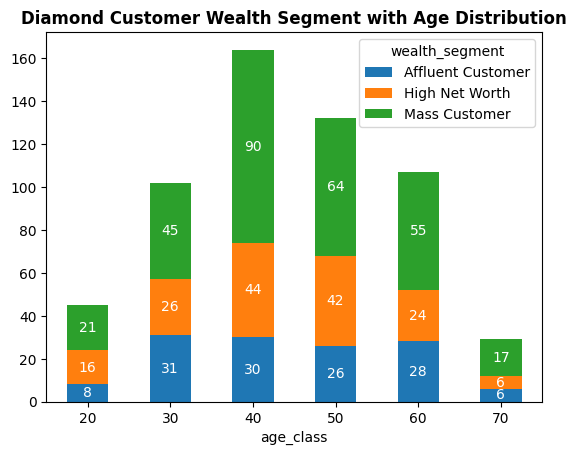

In [ ]:
# calculating data
group = df_target.groupby(['age_class', 'wealth_segment'])['customer_id'].count()
group = group.reset_index(name='count')
pvt = group.pivot_table(index='age_class', columns='wealth_segment', values='count')

# creating visualization
ax = pvt.plot(kind='bar', stacked=True)
plt.title('Diamond Customer Wealth Segment with Age Distribution', fontweight='bold')
plt.xticks(rotation=360)

# showing label in bars
for p in ax.patches:
    left, bottom, width, height =  p.get_bbox().bounds
    if height > 0 :
        ax.annotate("{0:.0f}".format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='w')

The mass customer segment still has a high value in the 40-50 age class.

**Diamond Customers State**

In [ ]:
# percentage state
state = df_target['state'].value_counts().reset_index()
state.columns = ['state', 'count']
state['percentage'] = (state['count']/state['count'].sum()*100).round(2)
state

,state,count,percentage
0,NSW,300,51.81
1,VIC,154,26.60
2,QLD,125,21.59


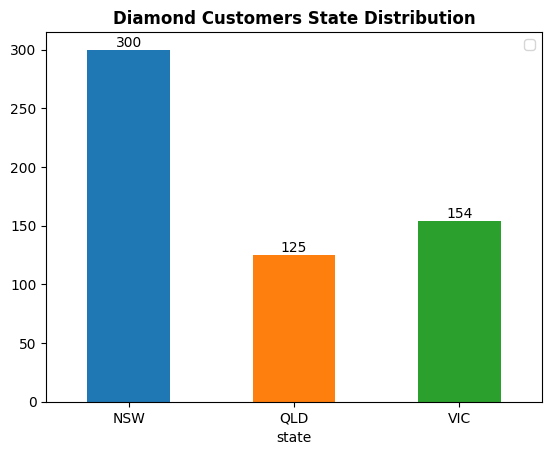

In [ ]:
# calculating data
group = df_target.groupby(['state'])['customer_id'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='state', y='count', color=sns.color_palette('tab10'))
plt.title('Diamond Customers State Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

The majority of Diamond customers are from New South Wales.

**Diamond Customers State with Wealth Segment**

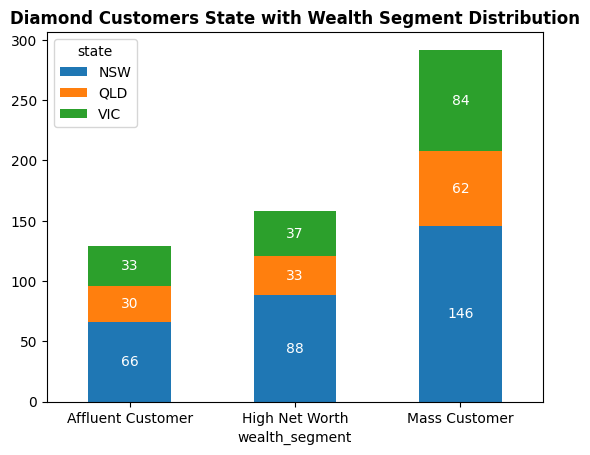

In [ ]:
# calculating data
group = df_target.groupby(['wealth_segment', 'state'])['customer_id'].count()
group = group.reset_index(name='count')
pvt = group.pivot_table(columns='state', index='wealth_segment', values='count')

# creating visualization
ax = pvt.plot(kind='bar', stacked=True)
plt.title('Diamond Customers State with Wealth Segment Distribution', fontweight='bold')
plt.xticks(rotation=360)

# showing label in bars
for p in ax.patches:
    left, bottom, width, height =  p.get_bbox().bounds
    if height > 0 :
        ax.annotate("{0:.0f}".format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='w')

Most of the customers come from **Mass Customers**, which is twice as much as the total Affluent Customers/High Net Worth. From this graph it can also be seen that NSW also still has a high value.

**Diamond Customers Job Industry**

In [ ]:
# percentage state
industry = df_target['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry_category', 'count']
industry['percentage'] = (industry['count']/state['count'].sum()*100).round(2)
industry

,job_industry_category,count,percentage
0,Financial Services,144,24.87
1,Manufacturing,119,20.55
2,Health,110,19.00
3,Retail,64,11.05
4,IT,47,8.12
5,Property,45,7.77
6,Entertainment,23,3.97
7,Argiculture,17,2.94
8,Telecommunications,10,1.73


Text(0, 0.5, 'Percentage')

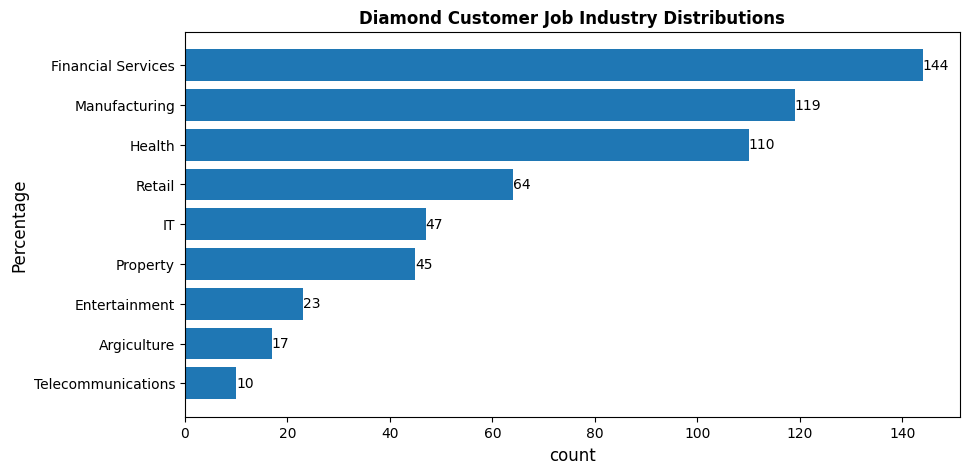

In [ ]:
# calculating data
indust = df_target['job_industry_category'].value_counts().reset_index()
indust.columns = ['job_industry', 'count']

# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

indust_sort = indust.sort_values(by=['count']).reset_index(drop=True)
bars = plt.barh(y=indust_sort['job_industry'], width= indust_sort['count'])
plt.bar_label(ax.containers[0]) 
plt.title('Diamond Customer Job Industry Distributions', fontweight='bold')
plt.xlabel('count',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

Most of Diamond customers are in **manufacturing, financial services, and health industry.**
****
**Diamond Customers Property Valuation**

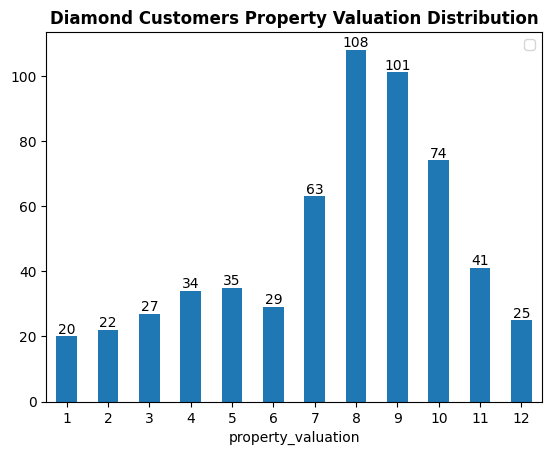

In [ ]:
# calculating data
group = df_target.groupby(['property_valuation'])['customer_id'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='property_valuation', y='count')
plt.title('Diamond Customers Property Valuation Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

Most Diamond customers have property valuation in range **7 - 10.**
## 8. Conclusion
Using the information that we got in the analysis, we can filter the target customer. They are :
- Aged between 35 - 55 (age_class 40 - 50).
- Work in  manufacture, financial services, or health industry.
- Classified as mass customer
- Live in New South Wales
- Have property valuation at 7-10 range

# **Source**

- https://www.prospectsoft.com/blogarticle/541/Using-RFM-Segmentation-to-grow-your-wholesale-distribution-or-manufacturing-business
- https://clevertap.com/blog/rfm-analysis/
- https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/
- https://medium.com/@ugursavci/customer-segmentation-using-rfm-analysis-in-python-218a3255f714
- https://medium.com/@melodyyip515_/rfm-customer-segmentation-using-python-1a1865c6e7cb
- https://github.com/vickymahfudy/E-commerce_RFM_Clustering
